<a href="https://colab.research.google.com/github/atlas-github/fstep_20/blob/main/fstep_20_stats_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear regression, correlation

The term regression is used when you try to **find the relationship between variables**.

In Machine Learning, and in statistical modeling, that relationship is **used to predict the outcome of future events**.

Linear regression uses the relationship between the data-points to draw a straight line through all them.

This line can be used to predict future values.

Source: [Machine Learning - Linear Regression](https://www.w3schools.com/python/python_ml_linear_regression.asp)

In [ ]:
#Start by drawing a scatter plot
import matplotlib.pyplot as plt

x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

plt.scatter(x, y)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

#Executes a method to return important key values of Linear Regression from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### INSERT CODE HERE ###

#Create a function that uses the slope and intercept values to return a new value. This new value represents where on the y-axis the corresponding x value will be placed
def myfunc(x):
  return slope * x + intercept

#Run each value of the x array through the function. This will result in a new array with new values for the y-axis
mymodel = list(map(myfunc, x))

#Draw the original scatter plot
plt.scatter(x, y)

#Draw the line of linear regression
plt.plot(x, mymodel)

#Display the diagram
plt.show()

In [ ]:
#Get the slope

### INSERT CODE HERE ###

In [ ]:
#Get the intercept

### INSERT CODE HERE ###

In [ ]:
#Get the r

### INSERT CODE HERE ###

It is common for different developers to get the same results using an alternate method. 

scikit-learn's [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) also has functions to calculate `slope`, `intercept`, and `r`.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

X = np.array(x).reshape(-1, 1)
Y = np.array(y).reshape(-1, 1)

reg = LinearRegression().fit(X, Y)
reg

##Exercise (Linear regression and correlation)

Refer to scikit-learn's [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), see if you can identify the functions needed to get the `slope`, `intercept`, and `r`. 

In [ ]:
### INSERT CODE HERE ###

In [ ]:
### INSERT CODE HERE ###

In [ ]:
### INSERT CODE HERE ###

#Logistic regression

Logistic regression is a **classification algorithm, used where the response variable is categorical**. 

Logistic regression is **used to find a relationship between features and probability of a particular outcome**. 

E.g. Predicting if a student passes or fails in an exam when the number of hours spent studying is given as a feature, the response variable has two values, pass and fail. 

More details [here](https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389).

Source: [Understanding Logistic Regression in Python](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)

In [ ]:
!wget http://nrvis.com/data/mldata/pima-indians-diabetes.csv

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically **predict whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets **consists of several medical predictor variables and one target variable, `label`**. 

Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Source: [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

##Load data

Start by loading the required Pima Indian Diabetes dataset using the pandas' read CSV function.

In [ ]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
pima

##Select feature

Here, you need to divide the given columns into two types of variables dependent (or target variable) and independent variable (or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp', 'pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

##Split data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

##Develop model and predict

Import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver = "liblinear")

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

##Evaluate model

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

##Visualize confusion matrix

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn. Here, you will visualize the confusion matrix using Heatmap.

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Evaluation metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

A classification rate of 80% is considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

##Advantages

Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

##Disadvantages

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

##Use `statsmodel.api` to get the coefficients 

In [ ]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

#x = add_constant(X)
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary())

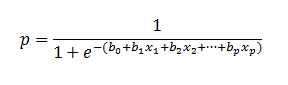

In [ ]:
from IPython.display import Image
Image("https://www.saedsayad.com/images/LogReg_eq.png")

Test the prediction function using `predict_proba`

In [ ]:
X_test.head(1)

*   pregnant: Number of times pregnant (0 to 17)
*   insulin: 2-hour serum insulin (muU/ml) (0 to 846)
*   bmi: Body mass index (0 to 67.1)
*   age: Age in years (21 to 81)
*   glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (0 to 199)
*   bp: Diastolic blood pressure (mm Hg) (0 to 122)
*   pedigree: Diabetes pedigree function (0.08 to 2.42)

In [ ]:
logreg.predict_proba(np.array(X_test.iloc[0, :]).reshape(1, -1))

In [ ]:
logreg.predict_proba(np.array([1, 0, 42.9, 22, 199, 76, 1.394]).reshape(1, -1))

##Exercise (Logistic regression)

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [ ]:
import pandas as pd
import numpy as np

#load dataset
income = pd.read_csv("adult.data", header = None, sep = ", ", names = ["age", "workclass", "fnlwgt", "education", "educational-num", 
                                                           "marital", "occupation", "relationship", "race", "gender", 
                                                           "capital gain", "capital loss", "hours per week", "country", "income"])

#code will replace the special character to nan and then drop the columns 
income['country'] = income['country'].replace('?',np.nan)
income['workclass'] = income['workclass'].replace('?',np.nan)
income['occupation'] = income['occupation'].replace('?',np.nan)

#dropping the NaN rows now 
income.dropna(how='any',inplace=True)

#dropping based on uniquness of data from the dataset 
income.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

#get rid of all leading white spaces
income.applymap(str.strip)

#mapping the data into numerical data using map function
income['income'] = income['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [ ]:
#gender
income['gender'] = income['gender'].map({'Male': 0, 'Female': 1}).astype(int)
#race
income['race'] = income['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
#marital
income['marital'] = income['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
#workclass
income['workclass'] = income['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
#education
income['education'] = income['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
#occupation
income['occupation'] = income['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
#relationship
income['relationship'] = income['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

Use the data below to build a logistic regression model to predict income levels. 

In [ ]:
income

In [ ]:
#split dataset in features and target variable

### INSERT CODE HERE ###

X = income[feature_cols] # Features
y = income.income # Target variable

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Initialize the linear regression model

### INSERT CODE HERE ###

#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)

### INSERT CODE HERE ###

In [ ]:
#Train our model with the training data

### INSERT CODE HERE ###

#print our price predictions on our test data

### INSERT CODE HERE ###

In [ ]:
#feeding the predict function with our test values in the format [['relationship','education','race','occupation','gender','marital','workclass']]

### INSERT CODE HERE ###

In [ ]:
from sklearn import metrics

#printing the accuracy values 

### INSERT CODE HERE ###

#Hypothesis Testing

One of the most famous libraries for hypothesis testing is [scipy](https://docs.scipy.org/doc/scipy/reference/stats.html)

##Shapiro-Wilk test for normality

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. [Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro)

In [ ]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

### INSERT CODE HERE ###

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

##Pearson's Correlation Coefficient

Calculates a Pearson correlation coefficient and the p-value for testing non-correlation. [Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr)

In [ ]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

### INSERT CODE HERE ###

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

##Chi-square test

Tests whether two categorical variables are related or independent.

Assumptions

*   Observations used in the calculation of the contingency table are independent.
*   25 or more examples in each cell of the contingency table.

Interpretation

*   H0: the two samples are independent.
*   H1: there is a dependency between the samples.

[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency)

In [ ]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]

### INSERT CODE HERE ###

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

##Paired t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

*   Observations in each sample are independent and identically distributed.
*   Observations in each sample are normally distributed.
*   Observations in each sample have the same variance.
*   Observations across each sample are paired.

Interpretation

*   H0: the means of the samples are equal.
*   H1: the means of the samples are unequal.

In [ ]:
# Example of the Paired t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

### INSERT CODE HERE ###

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')